In [ ]:
import random
#liste des valeurs
Liste = ['Orange','Bananes','Poire','Mangues']
random_keywords = random.sample(Liste, 4)
print(random_keywords)

['Bananes', 'Orange', 'Mangues', 'Poire']


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv('/content/Houses.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
df['parking'].max()

3

<Axes: >

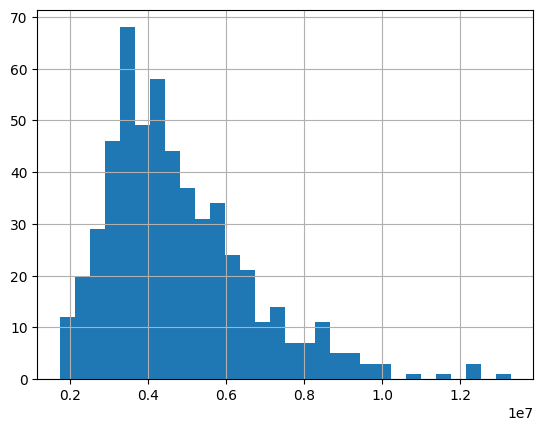

In [ ]:
df['price'].hist(bins=30)

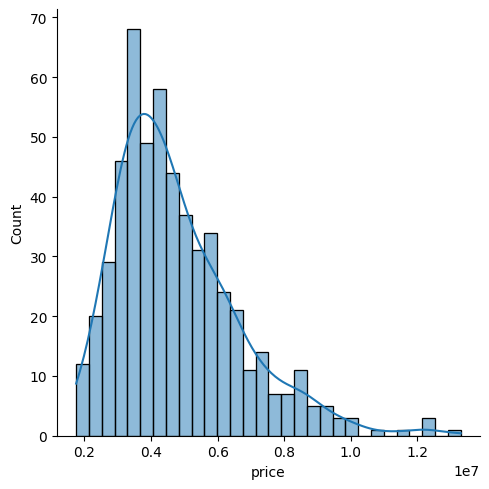

In [ ]:
sns.displot(data=df,x=df['price'],bins=30,kde=True);

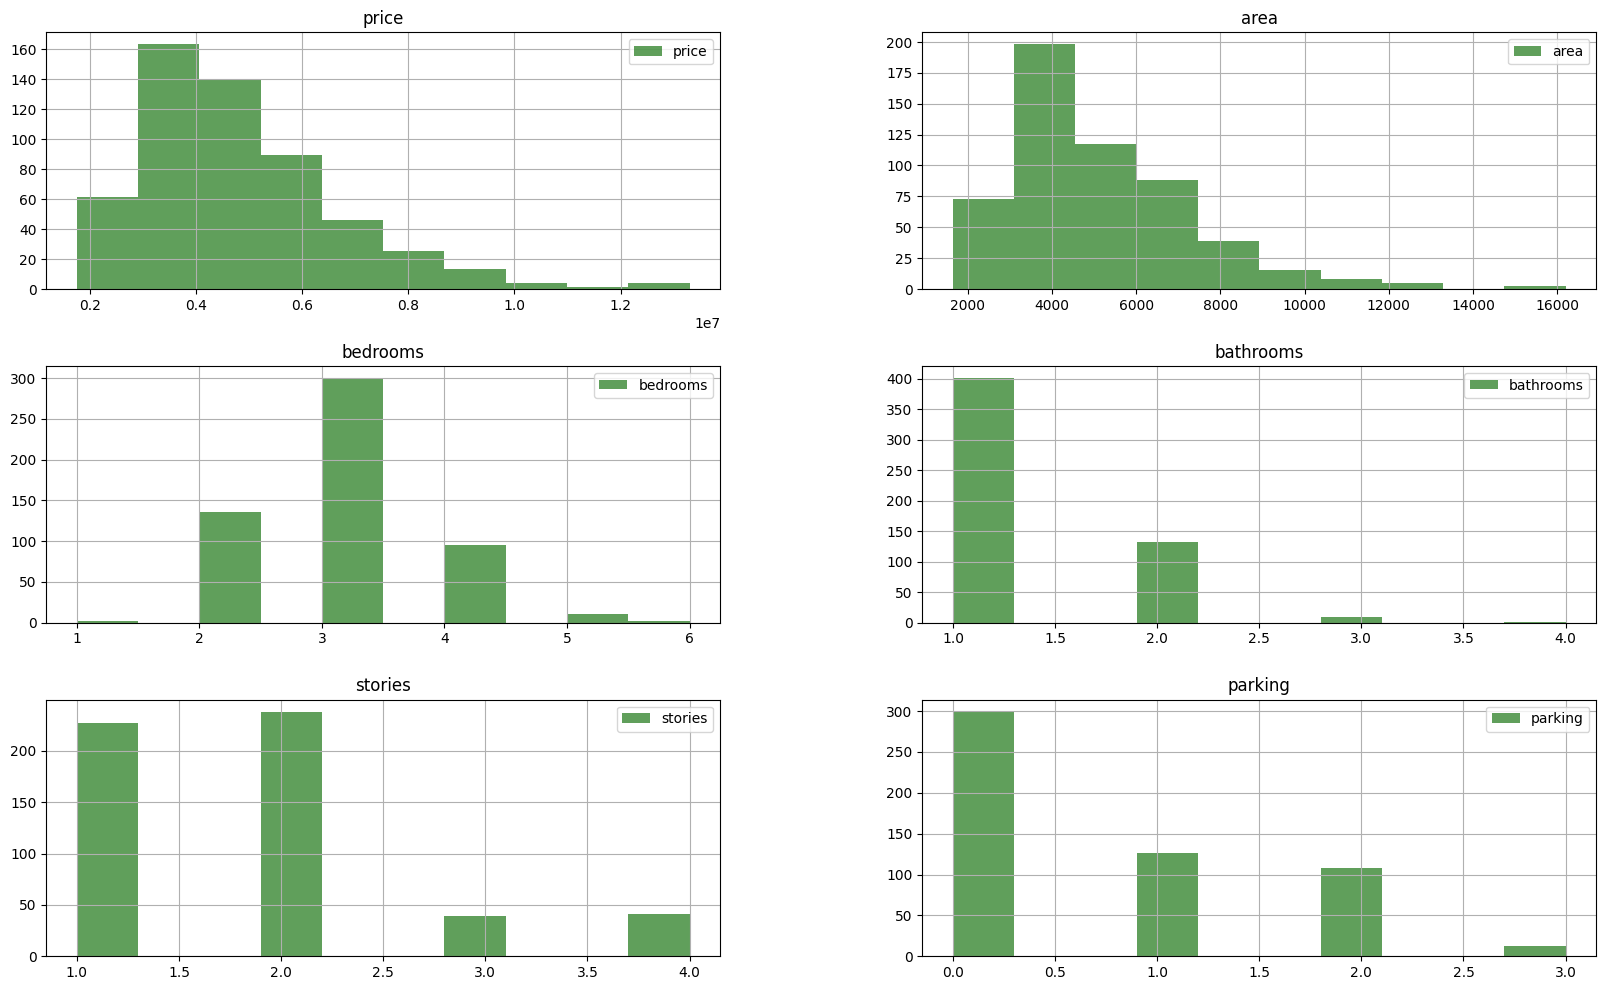

In [ ]:
df.hist(figsize=(20,12), color='#107009AA', legend=True)
plt.show()

<ipython-input-12-639d042d80c7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Correlation = df.corr().round(2)


<Axes: >

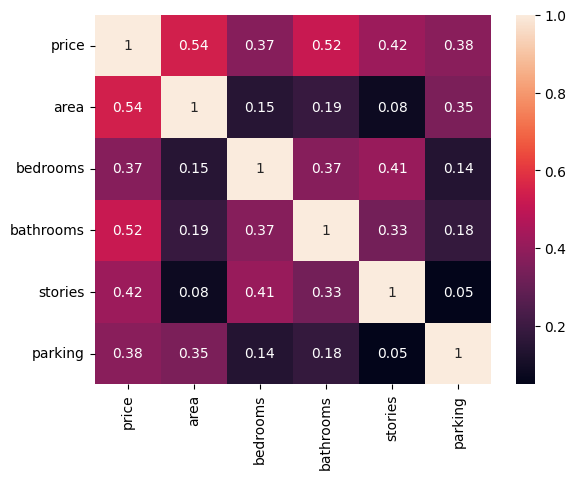

In [ ]:
Correlation = df.corr().round(2)
sns.heatmap(data=Correlation,annot=True)

In [ ]:
#features et target
X = df[['area','bathrooms']]
y = df['price']

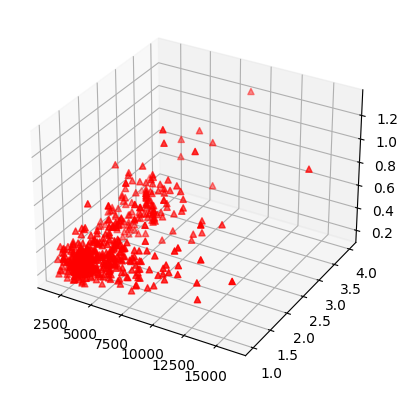

In [ ]:
graph = plt.figure()
ax = graph.add_subplot(111,projection='3d')
ax.scatter(df['area'],df['bathrooms'],df['price'],c ='r',marker='^')

In [ ]:
#Split du dataset
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state = 42)

In [ ]:
#Instancier le modele
model = LinearRegression()

In [ ]:
#Entrainer le model sur le training set
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
#Mise à echelle des données
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
scaler.fit(X_train)

StandardScaler()

In [ ]:
#mise à echelle des features en entier
scaler.fit(X_train,y_train)

StandardScaler()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
prediction = model.predict(X_train)

In [ ]:
print(model.predict(np.array([[7450,2]])))

[6721493.03992485]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
import pickle
pickle.dump(model,open('./model.sav', 'wb'))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')